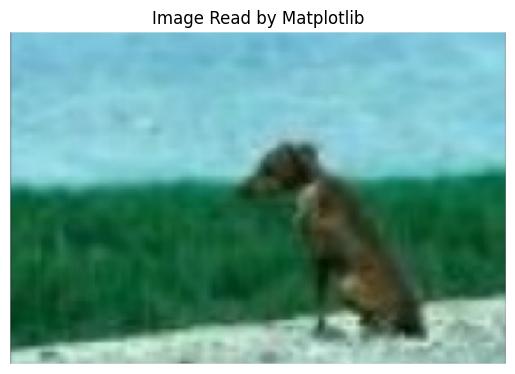

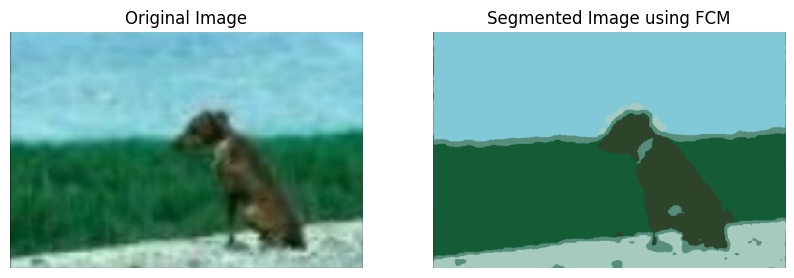

In [1]:
import cv2
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from matplotlib.image import imread

# 尝试使用 matplotlib 读取和显示图像
image_path = 'dog.png'
try:
    image = imread(image_path)
    plt.imshow(image)
    plt.title('Image Read by Matplotlib')
    plt.axis('off')
    plt.show()
except Exception as e:
    print(f"使用 matplotlib 读取图像时出错：{e}")

# 使用 OpenCV 读取图像
image = cv2.imread(image_path)

# 检查图像是否成功读取
if image is None:
    raise ValueError(f"无法读取图像，请检查图像路径：{image_path}")

# 将图像从BGR转换为RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 将图像数据转换为二维数组
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# 定义模糊C均值聚类的参数
k = 5  # 你可以根据需要更改聚类的数量
m = 2.0  # 模糊度系数，通常设置为2
error = 0.005  # 收敛准则
max_iter = 1000  # 最大迭代次数

# 应用模糊C均值算法
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    pixel_values.T, k, m, error=error, maxiter=max_iter, init=None)

# 获取聚类结果
labels = np.argmax(u, axis=0)
centers = cntr

# 将结果转换回图像形状
segmented_image = centers[labels].reshape(image.shape)
segmented_image = np.uint8(segmented_image)

# 显示原始图像和分割后的图像
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title('Segmented Image using FCM')
plt.axis('off')

plt.show()
